In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13702, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 13702 (delta 8), reused 11 (delta 4), pack-reused 13683
Receiving objects: 100% (13702/13702), 12.24 MiB | 21.24 MiB/s, done.
Resolving deltas: 100% (9569/9569), done.


In [2]:
!pip install -r ./yolov5/requirements.txt

In [3]:
%cd yolov5

/kaggle/working/yolov5


In [4]:
%ls

CONTRIBUTING.md  data/      hubconf.py         setup.cfg       utils/
LICENSE          detect.py  models/            train.py        val.py
README.md        export.py  requirements.txt*  tutorial.ipynb


In [5]:
!pip install -qU wandb
#!pip install -qU bbox-utility

In [6]:
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import glob

import shutil
import sys
sys.path.append('../input/surfer-detection-512px')

from joblib import Parallel, delayed

from IPython.display import display

In [7]:
MODEL     = 'yolov5s6'
BATCH     = 4
EPOCHS    = 25
OPTMIZER  = 'Adam'

PROJECT   = 'surfers_detection' # w&b in yolov5

ROOT_DIR  = '../input/surfer-detection-512px'
IMAGE_DIR = '../input/surfer-detection-512px/images' # directory to save images
LABEL_DIR = '../input/surfer-detection-512px/labels' # directory to save labels

In [8]:
%mkdir data/surfers-detection

In [9]:
%ls

CONTRIBUTING.md  data/      hubconf.py         setup.cfg       utils/
LICENSE          detect.py  models/            train.py        val.py
README.md        export.py  requirements.txt*  tutorial.ipynb


In [10]:
import yaml


data = dict(
    path  = 'data/surfers-detection/images/',
    train = 'train/',
    val   = 'val/',
    test  = 'test/',
    nc    = 1,
    names = ['surfer'],
    )

with open(os.path.join("./" , 'surfer.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

In [11]:
f = open(os.path.join("./" , 'surfer.yaml'), 'r')
print('\nyaml:')
print(f.read())


yaml:
names:
- surfer
nc: 1
path: data/surfers-detection/images/
test: test/
train: train/
val: val/



In [12]:
%ls data

Argoverse.yaml        VOC.yaml       hyps/               xView.yaml
GlobalWheat2020.yaml  VisDrone.yaml  images/
Objects365.yaml       coco.yaml      scripts/
SKU-110K.yaml         coco128.yaml   surfers-detection/


In [13]:
%cp -r ../../input/surfer-detection-512px/* ./data/surfers-detection/

In [14]:
%%writefile hyp.yaml
lr0: 0.008  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.60  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.02  # image HSV-Hue augmentation (fraction)
hsv_s: 0.4  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.2  # image HSV-Value augmentation (fraction)
degrees: 0.05  # image rotation (+/- deg)
translate: 0.5  # image translation (+/- fraction)
scale: 0.02  # image scale (+/- gain)
shear: 0.02  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 0.02  # image mosaic (probability)
mixup: 0.05 # image mixup (probability)
copy_paste: 0.0  # segment copy-paste (probability)

Writing hyp.yaml


In [15]:
!python train.py --img 512 --batch 32 --epochs 1000 --data surfer.yaml --weights yolov5m.pt --cache --hyp hyp.yaml

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5m.pt, cfg=, data=surfer.yaml, hyp=hyp.yaml, epochs=1000, batch_size=32, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-221-gd07f9ce Python-3.7.12 torch-1.9.1 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.008, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epoch

In [16]:
%ls runs/train/exp

F1_curve.png                                      results.png
PR_curve.png                                      train_batch0.jpg
P_curve.png                                       train_batch1.jpg
R_curve.png                                       train_batch2.jpg
confusion_matrix.png                              val_batch0_labels.jpg
events.out.tfevents.1653427240.a228765a670d.99.0  val_batch0_pred.jpg
hyp.yaml                                          val_batch1_labels.jpg
labels.jpg                                        val_batch1_pred.jpg
labels_correlogram.jpg                            val_batch2_labels.jpg
opt.yaml                                          val_batch2_pred.jpg
results.csv                                       weights/


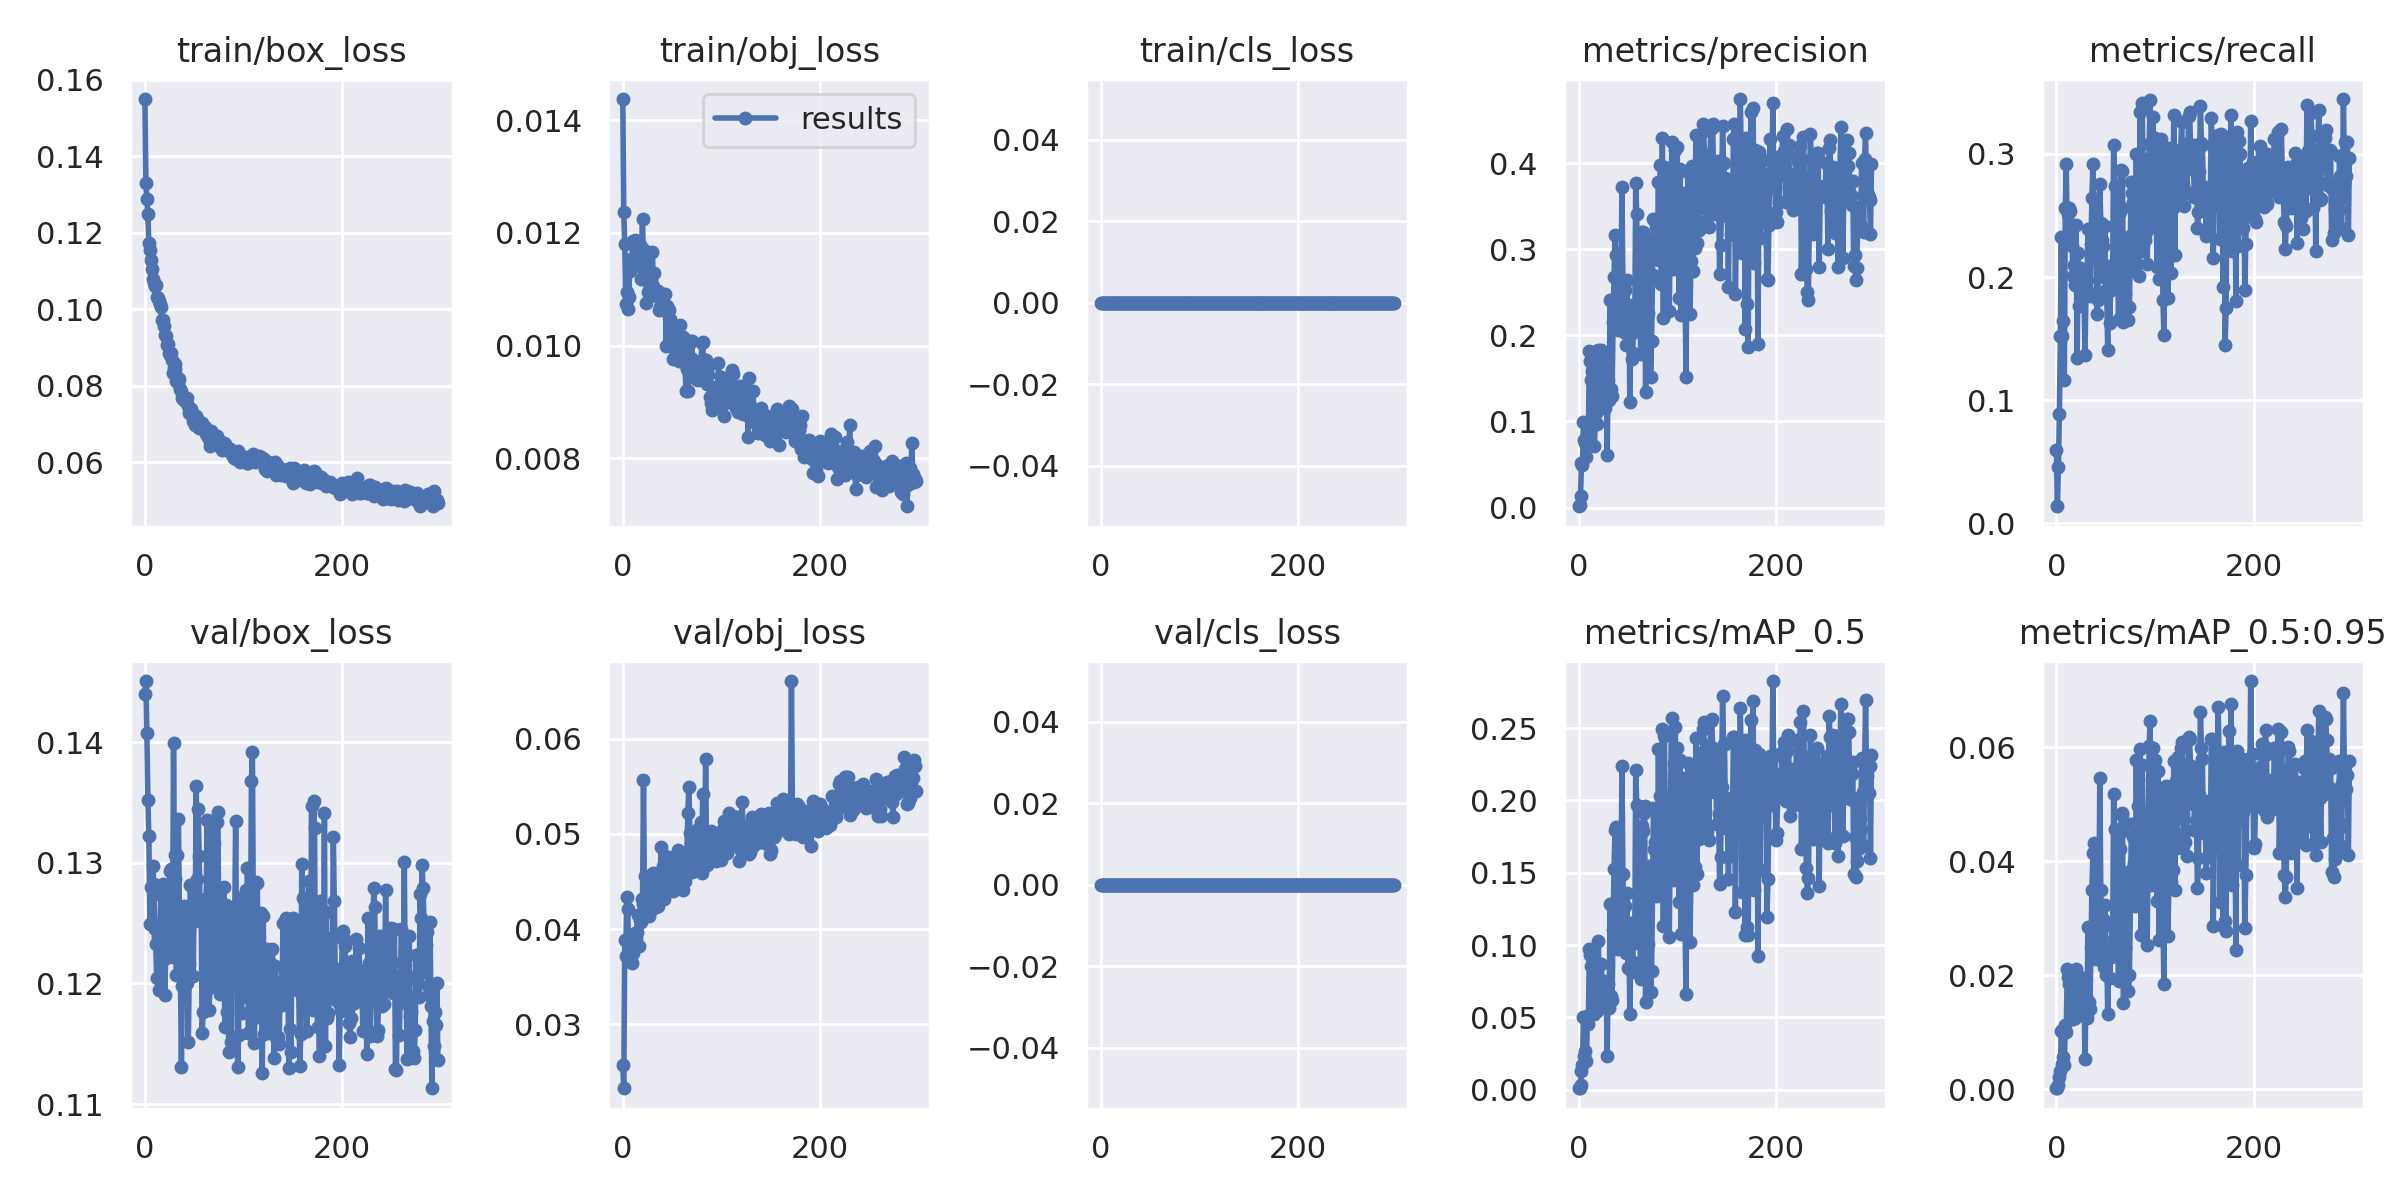

In [17]:
import IPython
from IPython.display import display
IPython.display.Image(filename='./runs/train/exp/results.png') 

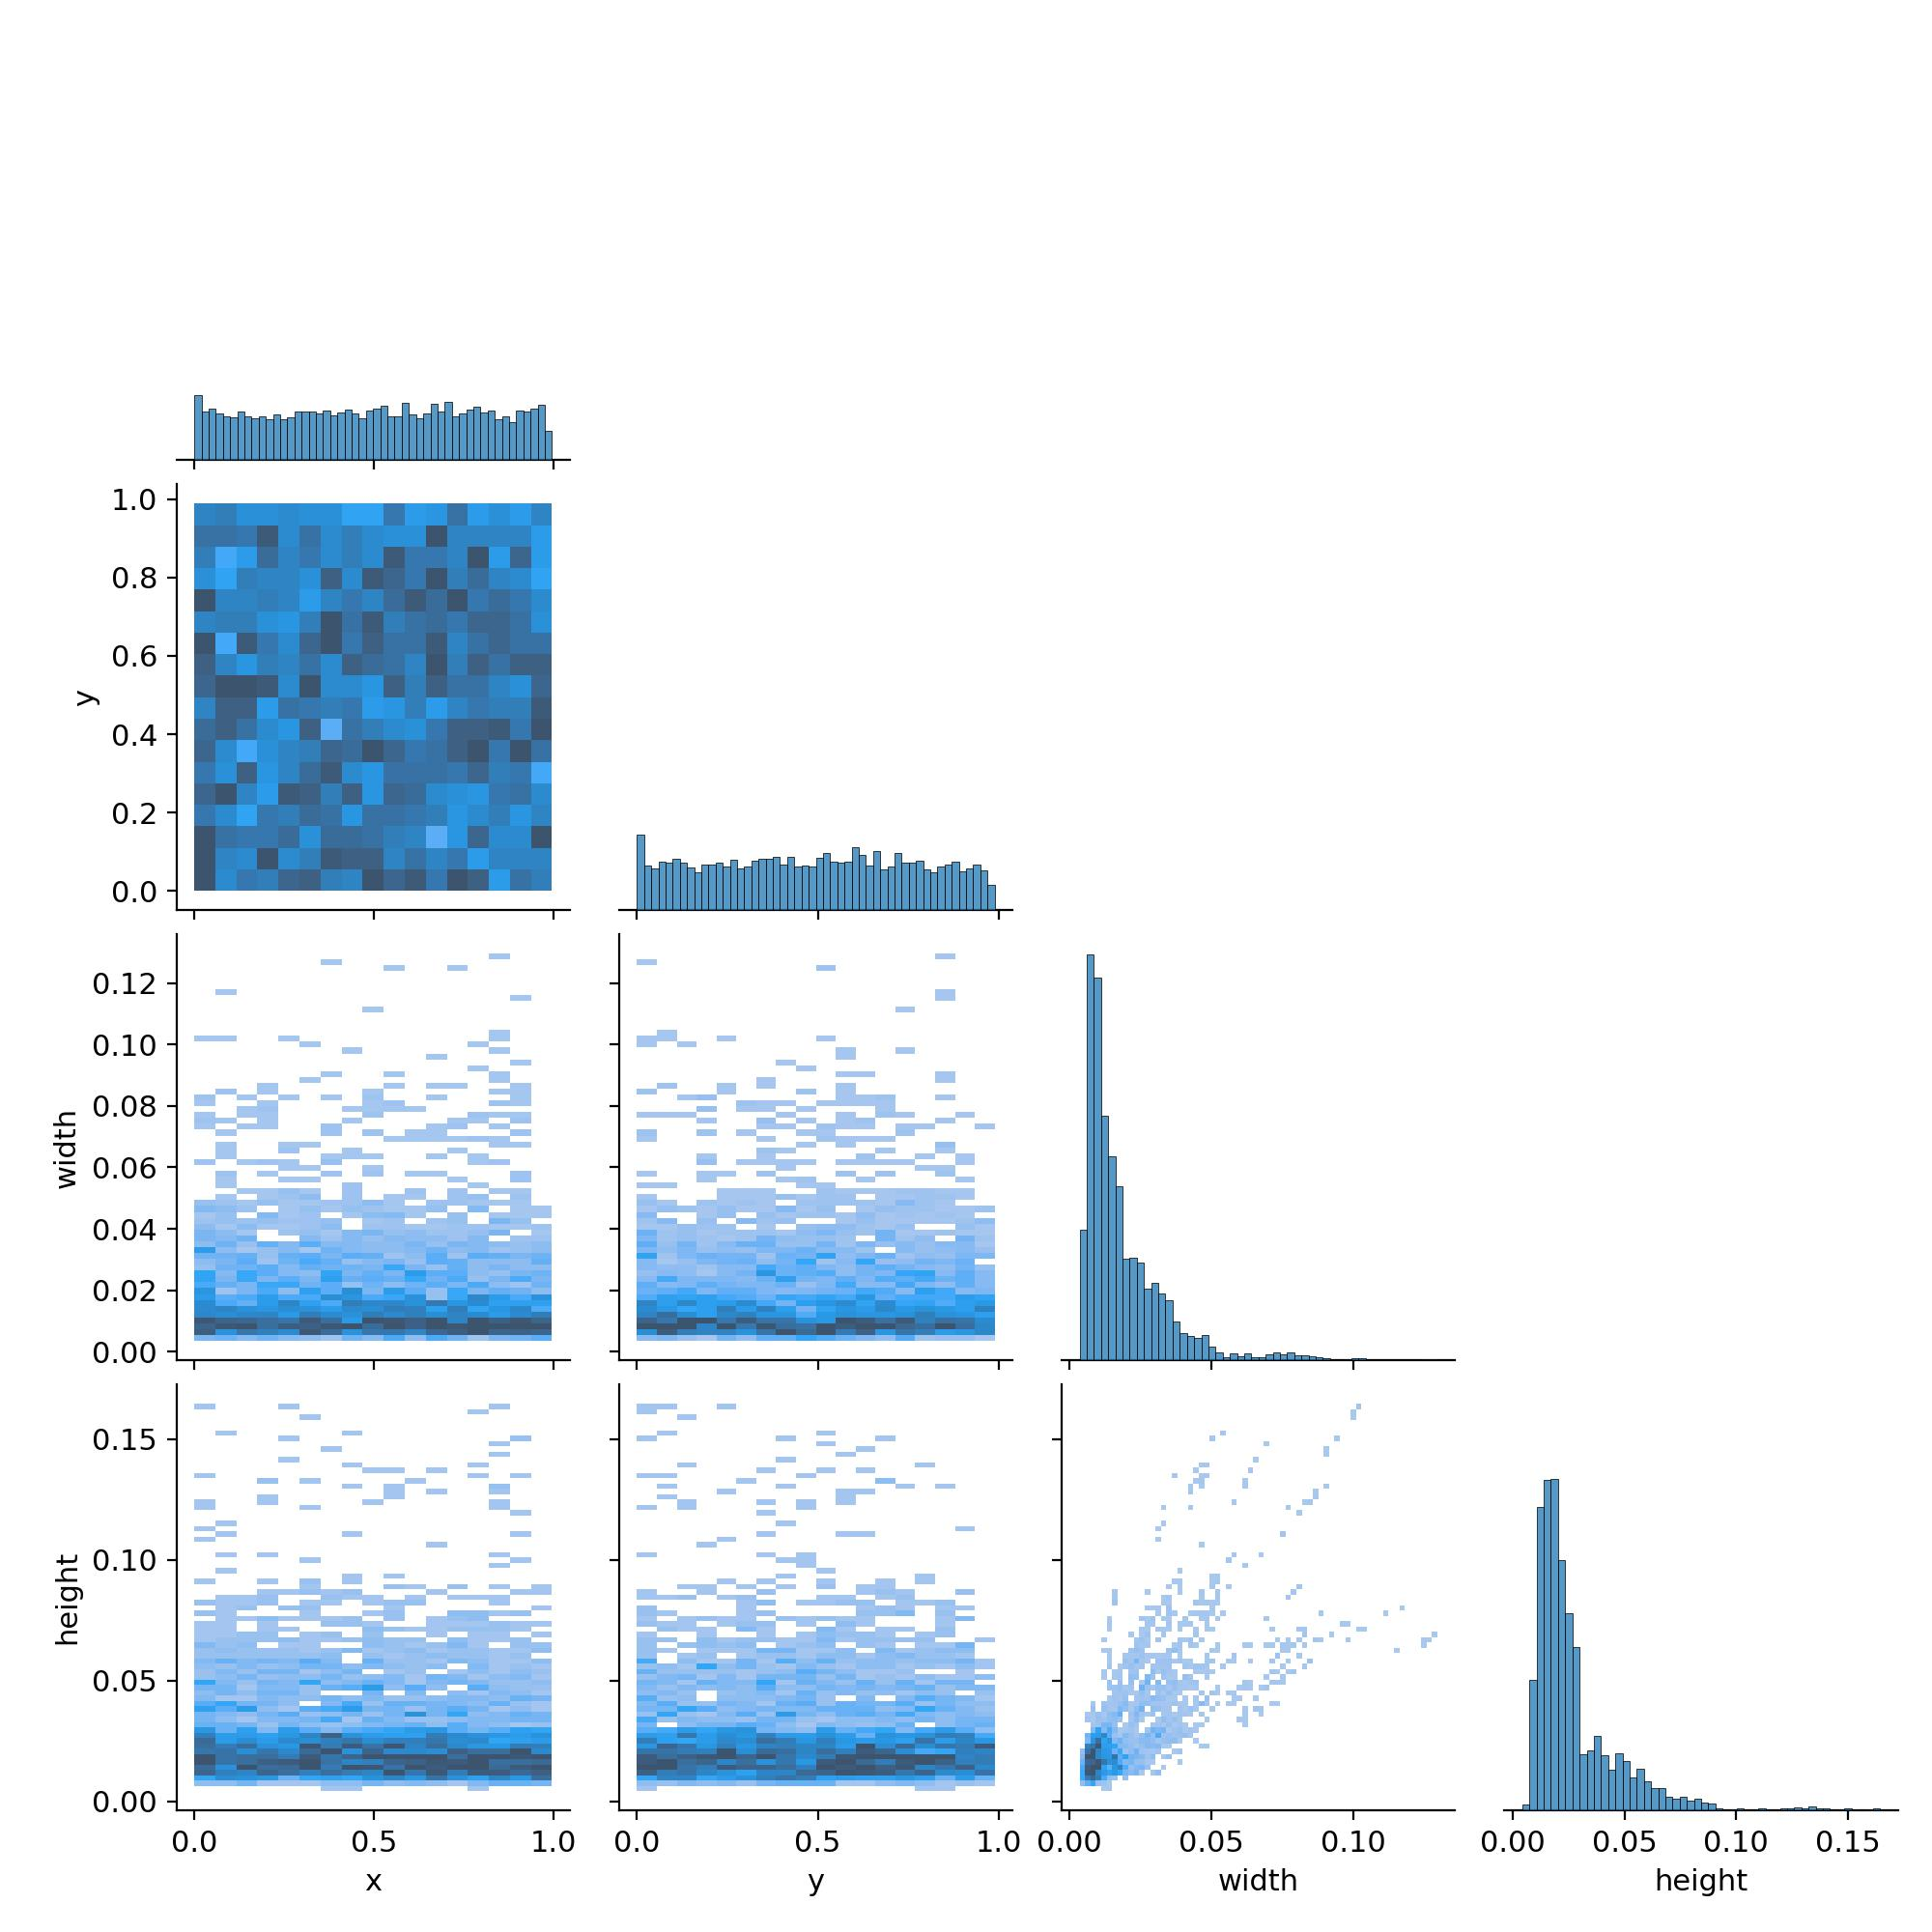

In [18]:
IPython.display.Image(filename='./runs/train/exp/labels_correlogram.jpg') 